In [90]:
import numpy as np
import matplotlib.pyplot as plt

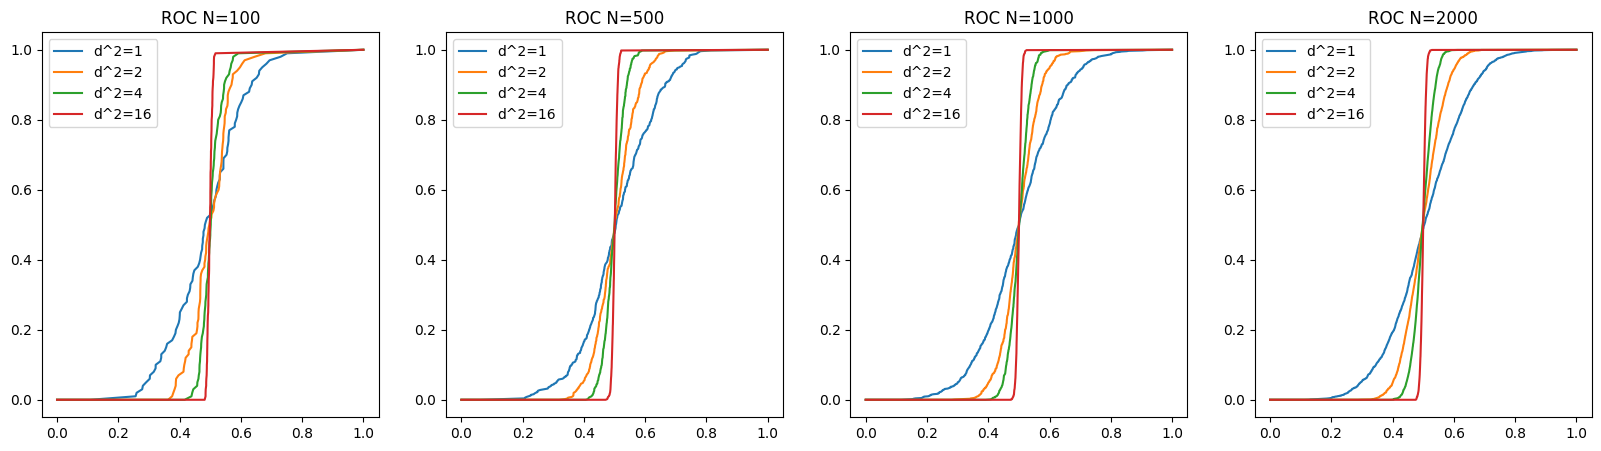

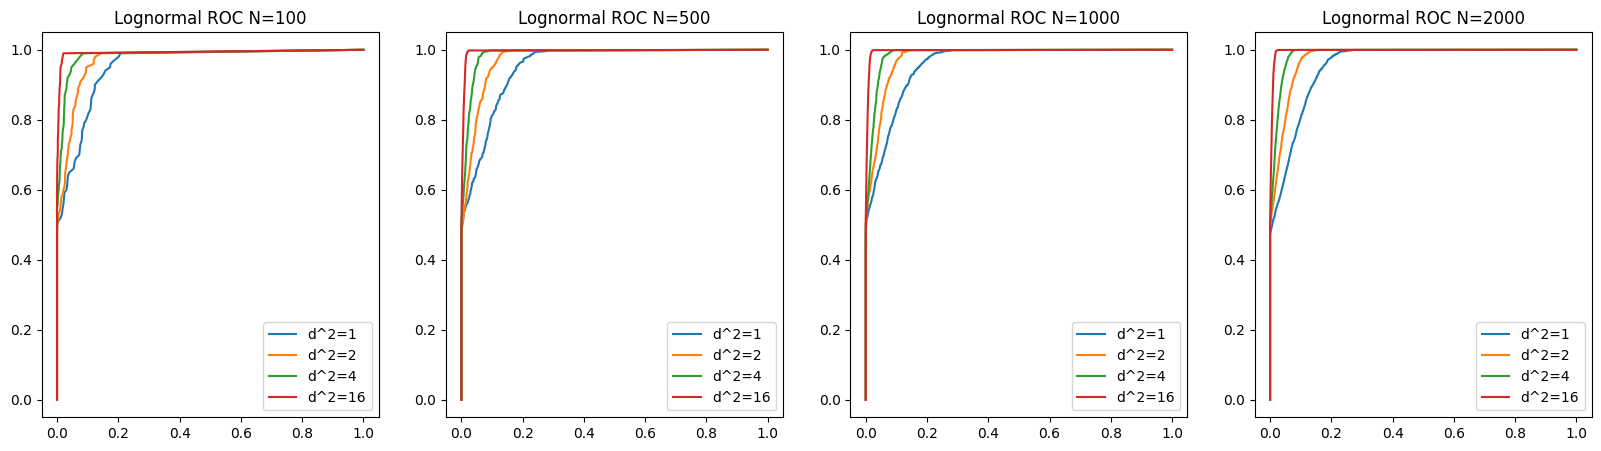

In [89]:
Mu1MinusMu0 = 0-(1/2)

def calcPdPfa(data):
    numdata = data.shape[0]
    detection = numdata
    pd = [1]
    pfa = [1]
    for i in data:

        if i < -1:
            pfa.append(1)
        elif i >= -1 and i <= 1:
            pfa.append(1 - (i+1)*0.5)
        else:
            pfa.append(0) 
        detection -= 1
        pd.append(detection/numdata)
    pd.append(0)
    pfa.append(0)
    return pd,pfa  

def plotRoc(ax, n, lognormal=False):
    # d^2 = (Mu1MinusMu0)**2/sigmasq
    for i,d2 in enumerate([1,2,4,16]):
        sigma_sq = (Mu1MinusMu0**2)/d2
        if lognormal:
            data = np.random.lognormal(0, sigma_sq, n)
        else:
            data = np.random.normal(0, sigma_sq,n)
        data.sort()
        pd,pfa = calcPdPfa(data)
        ax.plot(pfa,pd, label=f"d^2={d2}") 


# normal ROC
fig,ax = plt.subplots(1,4,figsize=(20, 5))
for i,n in enumerate([100,500,1000,2000]):
    plotRoc(ax[i], n, lognormal=False)
    ax[i].legend()
    ax[i].set_title(f"ROC N={n}")
plt.show()

# lognormal ROC
fig,ax = plt.subplots(1,4,figsize=(20, 5))
for i,n in enumerate([100,500,1000,2000]):
    plotRoc(ax[i], n, lognormal=True)
    ax[i].legend()
    ax[i].set_title(f"Lognormal ROC N={n}")
plt.show()

